# 17. [Decision Trees 決策樹](https://github.com/joelgrus/data-science-from-scratch/blob/master/code/decision_trees.py)

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/wei/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'entropy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
from __future__ import division
from collections import Counter, defaultdict
from functools import partial
import math, random
from pprint import pprint

## 每個事件本身的 訊息量 
https://zh.wikipedia.org/wiki/%E7%86%B5_(%E4%BF%A1%E6%81%AF%E8%AE%BA)  

如果有一個系統S內存在多個事件$S = {E_1,...,E_n}$，每個事件的機率分布$P = {p_1, ..., p_n}$，則每個事件本身的**訊息量**（資訊本體）為：  

${\displaystyle I_{e}=-\log _{2}{p_{i}}} $ （對數以2為底，單位是位元（bit））  

${\displaystyle I_{e}=-\ln {p_{i}}}$（對數以 ${\displaystyle e}$ e為底，單位是納特/nats）  


如英語有26個字母，假如每個字母在文章中出現次數平均的話，每個字母的訊息量為：  

${\displaystyle I_{e}=-\log _{2}{1 \over 26}=4.7}$  

每個字母的訊息量 4.70043971814
平均訊息量 (entropy) 4.70043971814


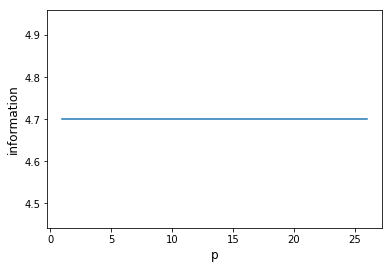

In [16]:
dice_points = range(1, 27)
n = len(dice_points)
p = 1/n 
print('每個字母的訊息量', -np.log2(p))
print('平均訊息量 (entropy)', -np.log2(p) * n / n)
plt.plot(dice_points, [-np.log2(p) for _ in dice_points]) 
plt.xlabel('p', fontsize = 12)
plt.ylabel('information', fontsize = 12);

### 事件的機率越小，訊息量越高; 機率 ＝ 1 （每次都發生）的事件，訊息量為 0

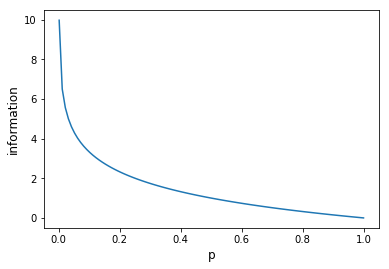

In [17]:
p = np.linspace(0.001, 1, 100)
plt.plot(p, -np.log2(p))  # 不同機率的事件的 訊息量 
plt.xlabel('p', fontsize = 12)
plt.ylabel('information', fontsize = 12);

### 每個事件的 entropy (訊息量 期望值) = 機率 * 訊息量 

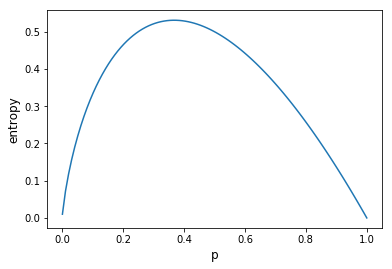

In [40]:
p = np.linspace(0.001, 1, 100)
plt.plot(p, -p*np.log2(p))  # 每個事件本身的 entropy
plt.xlabel('p', fontsize = 12)
plt.ylabel('entropy', fontsize = 12);

## 熵是整個系統的**平均**消息量
熵是整個系統的平均消息量，即：  

${\displaystyle H_{s}=\sum _{i=1}^{n}p_{i}I_{e}=-\sum _{i=1}^{n}p_{i}\log _{2}p_{i}}$    

### Entropy 是 每發生一個事件 資訊量的期望值  

依據Boltzmann's H-theorem，夏農把隨機變量X的熵值 Η（希臘字母Eta）定義如下，其值域為{x1, ..., xn}：  

${\displaystyle \mathrm {H} (X)=\mathrm {E} [\mathrm {I} (X)]=\mathrm {E} [-\ln(\mathrm {P} (X))]}$   





其中，P為X的機率質量函數（probability mass function），E為期望函數，而I(X)是X的資訊量（又稱為資訊本體）。I(X)本身是個隨機變數。  

當取自有限的樣本時，熵的公式可以表示為：  

${\displaystyle \mathrm {H} (X)=\sum _{i}{\mathrm {P} (x_{i})\,\mathrm {I} (x_{i})}=-\sum _{i}{\mathrm {P} (x_{i})\log _{b}\mathrm {P} (x_{i})}} $   

整個系統的平均消息量 (熵) 4.70043971814


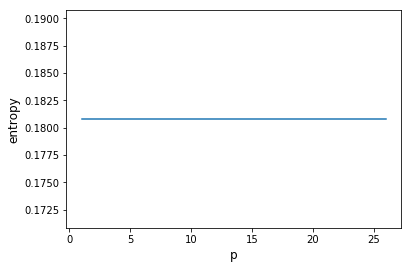

In [19]:
dice_points = range(1, 27)
n = len(dice_points)
p = 1/n
entropy = np.sum([-p * np.log2(p) for _ in dice_points])
print('整個系統的平均消息量 (熵)', entropy)
plt.plot(dice_points, [-p * np.log2(p) for _ in dice_points])  # 熵是整個系統的平均消息量
plt.xlabel('p', fontsize = 12)
plt.ylabel('entropy', fontsize = 12);

In [20]:
def entropy(class_probabilities):
    """given a list of class probabilities, compute the entropy"""
    return sum(-p * math.log(p, 2) for p in class_probabilities if p) 

In [21]:
def class_probabilities(labels):
    total_count = len(labels)
    return [count / total_count
            for count in Counter(labels).values()]

labels = [random.choice(list('abcdef')) for _ in range(200)]
class_probabilities(labels)

[0.175, 0.155, 0.185, 0.165, 0.15, 0.17]

In [22]:
random.seed(0)
entropy(class_probabilities(labels))

2.5813550590100536

In [23]:
# 計算 一組 labeled_data 樣本的 entropy 值
def data_entropy(labeled_data):        
    labels = [label for _, label in labeled_data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

random.seed(0)
labels = [random.choice(list('abcdef')) for _ in range(200)]
data_entropy(enumerate(labels))

2.568046576571606

In [24]:
# Entropy of Partition 切分亂度
def partition_entropy(subsets):
    """find the entropy from this partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)
    
    return sum( data_entropy(subset) * (len(subset) / total_count)
                for subset in subsets )

In [25]:
inputs = [
    ({'level':'Senior','lang':'Java','tweets':'no','phd':'no'},   False),
    ({'level':'Senior','lang':'Java','tweets':'no','phd':'yes'},  False),
    ({'level':'Mid','lang':'Python','tweets':'no','phd':'no'},     True),
    ({'level':'Junior','lang':'Python','tweets':'no','phd':'no'},  True),
    ({'level':'Junior','lang':'R','tweets':'yes','phd':'no'},      True),
    ({'level':'Junior','lang':'R','tweets':'yes','phd':'yes'},    False),
    ({'level':'Mid','lang':'R','tweets':'yes','phd':'yes'},        True),
    ({'level':'Senior','lang':'Python','tweets':'no','phd':'no'}, False),
    ({'level':'Senior','lang':'R','tweets':'yes','phd':'no'},      True),
    ({'level':'Junior','lang':'Python','tweets':'yes','phd':'no'}, True),
    ({'level':'Senior','lang':'Python','tweets':'yes','phd':'yes'},True),
    ({'level':'Mid','lang':'Python','tweets':'no','phd':'yes'},    True),
    ({'level':'Mid','lang':'Java','tweets':'yes','phd':'no'},      True),
    ({'level':'Junior','lang':'Python','tweets':'no','phd':'yes'},False)
]

x = inputs[0]
attribute = 'level'
x[0][attribute]

'Senior'

In [26]:
# 依據特定 key 切分群組
def group_by(items, key_fn):
    """returns a defaultdict(list), where each input item 
    is in the list whose key is key_fn(item)"""
    groups = defaultdict(list)
    for item in items:
        key = key_fn(item)
        groups[key].append(item)
    return groups

# attribute = 'level'
# pprint(group_by(inputs, lambda x: x[0][attribute]))

In [27]:
# 依據特定屬性做群組切分
def partition_by(inputs, attribute):
    """returns a dict of inputs partitioned by the attribute
    each input is a pair (attribute_dict, label)"""
    return group_by(inputs, lambda x: x[0][attribute]) 

# attribute = 'level'
# pprint(partition_by(inputs, attribute))

In [28]:
# 依據特定屬性切分之後的 切分亂度
def partition_entropy_by(inputs,attribute):
    """computes the entropy corresponding to the given partition"""        
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())   

attribute = 'level'
partition_entropy_by(inputs, attribute)

0.6935361388961918

In [29]:
# 在 tree 已經知道的情況下，對某個 input 做 True/False 的判斷
# tree:
# ('level',
#  {None: True,
#   'Junior': ('phd', {None: True, 'no': True, 'yes': False}),
#   'Mid': True,
#   'Senior': ('tweets', {None: False, 'no': False, 'yes': True})})

def classify(tree, input):
    """classify the input using the given decision tree"""
    
    # if this is a leaf node, return its value
    if tree in [True, False]:
        return tree
   
    # otherwise find the correct subtree
    attribute, subtree_dict = tree
    
    subtree_key = input.get(attribute)  # None if input is missing attribute

    if subtree_key not in subtree_dict: # if no subtree for key,
        subtree_key = None              # we'll use the None subtree
    
    subtree = subtree_dict[subtree_key] # choose the appropriate subtree
    return classify(subtree, input)     # and use it to classify the input

In [30]:
def build_tree_id3(inputs, split_candidates=None):

    # if this is our first pass, 
    # all keys of the first input are split candidates
    if split_candidates is None:
        split_candidates = inputs[0][0].keys()  # dict_keys(['level', 'lang', 'tweets', 'phd'])

    # count Trues and Falses in the inputs
    num_inputs = len(inputs)
    num_trues = len([label for item, label in inputs if label])
    num_falses = num_inputs - num_trues
    
    if num_trues == 0:                  # if only Falses are left
        return False                    # return a "False" leaf
        
    if num_falses == 0:                 # if only Trues are left
        return True                     # return a "True" leaf

    if not split_candidates:            # if no split candidates left
        return num_trues >= num_falses  # return the majority leaf
                            
    # otherwise, split on the best attribute
    # 能獲得 最小切分亂度 的屬性
    # 切分亂度最小，表示 下一個事件 資訊量的期望值最小，也就是 越能預測結果，越確定
    best_attribute = min(split_candidates, key=partial(partition_entropy_by, inputs))

    partitions = partition_by(inputs, best_attribute)
    new_candidates = [a for a in split_candidates 
                      if a != best_attribute]
    
    # recursively build the subtrees
    # 遞迴 建構子樹
    subtrees = { attribute : build_tree_id3(subset, new_candidates)
                 for attribute, subset in partitions.items() }

    subtrees[None] = num_trues > num_falses # default case

    return (best_attribute, subtrees)

In [31]:
# Random Forests
# 可以用 bootstrap 重複取樣 產生不同的 決策數
# bootstrap aggregating / bagging

def forest_classify(trees, input):
    votes = [classify(tree, input) for tree in trees]  # 每棵決策數 所做出的判斷
    vote_counts = Counter(votes)  # 計數
    return vote_counts.most_common(1)[0][0]  # 票選結果

In [59]:
inputs = [
    ({'level':'Senior','lang':'Java','tweets':'no','phd':'no'},   False),
    ({'level':'Senior','lang':'Java','tweets':'no','phd':'yes'},  False),
    ({'level':'Mid','lang':'Python','tweets':'no','phd':'no'},     True),
    ({'level':'Junior','lang':'Python','tweets':'no','phd':'no'},  True),
    ({'level':'Junior','lang':'R','tweets':'yes','phd':'no'},      True),
    ({'level':'Junior','lang':'R','tweets':'yes','phd':'yes'},    False),
    ({'level':'Mid','lang':'R','tweets':'yes','phd':'yes'},        True),
    ({'level':'Senior','lang':'Python','tweets':'no','phd':'no'}, False),
    ({'level':'Senior','lang':'R','tweets':'yes','phd':'no'},      True),
    ({'level':'Junior','lang':'Python','tweets':'yes','phd':'no'}, True),
    ({'level':'Senior','lang':'Python','tweets':'yes','phd':'yes'},True),
    ({'level':'Mid','lang':'Python','tweets':'no','phd':'yes'},    True),
    ({'level':'Mid','lang':'Java','tweets':'yes','phd':'no'},      True),
    ({'level':'Junior','lang':'Python','tweets':'no','phd':'yes'},False)
]

In [61]:
inputs[0][0].keys()

dict_keys(['level', 'lang', 'tweets', 'phd'])

In [60]:
for key in ['level','lang','tweets','phd']:
    print(key, partition_entropy_by(inputs, key))
print()

# level 的切紛亂度最低，所以依據 level 再切分子樹

level 0.6935361388961918
lang 0.8601317128547441
tweets 0.7884504573082896
phd 0.8921589282623617



In [58]:
# level = 'Junior' 的情況下計算各種切分方式的切分亂度

junior_inputs = [(input, label)
                 for input, label in inputs if input["level"] == "Junior"]

for key in ['lang', 'tweets', 'phd']:
    print(key, partition_entropy_by(junior_inputs, key))
print()

# phd 的切分段度最低

lang 0.9509775004326937
tweets 0.9509775004326937
phd 0.0



In [57]:
# level = 'Mid' 的情況下計算各種切分方式的切分亂度

mid_inputs = [(input, label)
              for input, label in inputs if input["level"] == "Mid"]

for key in ['lang', 'tweets', 'phd']:
    print(key, partition_entropy_by(mid_inputs, key))
print()

# 0 亂度

lang 0.0
tweets 0.0
phd 0.0



In [46]:
# level = 'Senior' 的情況下計算各種切分方式的切分亂度

senior_inputs = [(input, label)
                 for input, label in inputs if input["level"] == "Senior"]

for key in ['lang', 'tweets', 'phd']:
    print(key, partition_entropy_by(senior_inputs, key))
print()

# tweets 的切分段度最低

lang 0.4
tweets 0.0
phd 0.9509775004326937



In [52]:
# 使用 ID3 的演算法 建構決策樹

print("building the tree")
tree = build_tree_id3(inputs)
pprint(tree)

building the tree
('level',
 {None: True,
  'Junior': ('phd', {None: True, 'no': True, 'yes': False}),
  'Mid': True,
  'Senior': ('tweets', {None: False, 'no': False, 'yes': True})})


In [54]:
# 判斷一個 input 的結果是 True 或 False

print("Junior / Java / tweets / no phd",  
      classify(tree, 
               {"level" : "Junior", 
                "lang" : "Java", 
                "tweets" : "yes", 
                "phd" : "no"}
              )
     )

Junior / Java / tweets / no phd True


In [55]:
# 判斷一個 input 的結果是 True 或 False

print("Junior / Java / tweets / phd", 
      classify(tree, 
               {"level" : "Junior", 
                "lang" : "Java", 
                "tweets" : "yes", 
                "phd" : "yes"} 
              )
     )

Junior / Java / tweets / phd False


In [56]:
# 判斷一個 input 的結果是 True 或 False

print("Intern", classify(tree, { "level" : "Intern" } ))
print("Senior", classify(tree, { "level" : "Senior" } ))

Intern True
Senior False
